# FPR Calculations

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# List of diseases
diseases = [
    "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", 
    "Edema", "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", 
    "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices", "No Finding"
]

# calculate FPR
def calculate_fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn) if (fp + tn) > 0 else 0

# find the best threshold based on F1 score
def find_best_threshold(y_true, y_prob):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        tp = ((y_pred == 1) & (y_true == 1)).sum()
        fp = ((y_pred == 1) & (y_true == 0)).sum()
        fn = ((y_pred == 0) & (y_true == 1)).sum()
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold

# calculate FPR by gender for a specific disease
def calculate_fpr_by_gender(df, disease):
    y_true = df[f"{disease}_ground_truth"]
    y_prob = df[f"{disease}_probability"]
    best_threshold = find_best_threshold(y_true, y_prob)
    y_pred = (y_prob >= best_threshold).astype(int)
    
    fprs = {}
    for gender in df["gender"].dropna().unique():
        gender_subset = df[df["gender"] == gender]
        if gender_subset[f"{disease}_ground_truth"].nunique() < 2 or gender_subset[f"{disease}_probability"].nunique() < 2:
            fprs[gender] = None
        else:
            y_true_gender = gender_subset[f"{disease}_ground_truth"]
            y_pred_gender = (gender_subset[f"{disease}_probability"] >= best_threshold).astype(int)
            fprs[gender] = calculate_fpr(y_true_gender, y_pred_gender)
    return fprs

# process a CSV file and calculate FPRs for all diseases by gender
def process_csv(file_path):
    df = pd.read_csv(file_path)
    fpr_results = {}
    for disease in diseases:
        fpr_results[disease] = calculate_fpr_by_gender(df, disease)
    return fpr_results

# Process all CSV files
csv_files = ["baseline.csv", "adversarial.csv", "finetuned.csv", "ensemble.csv", "committee20.csv"]
fpr_data = {csv_file: process_csv(csv_file) for csv_file in csv_files}

## FPR by Gender (Male) for each disease across models

/var/folders/kt/w5w6m1w927nd4t7dr10qjl840000gn/T/ipykernel_40662/1549498763.py:23: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=plot_df, x="Disease", y="FPR", hue="Model", palette=pastel_colors)


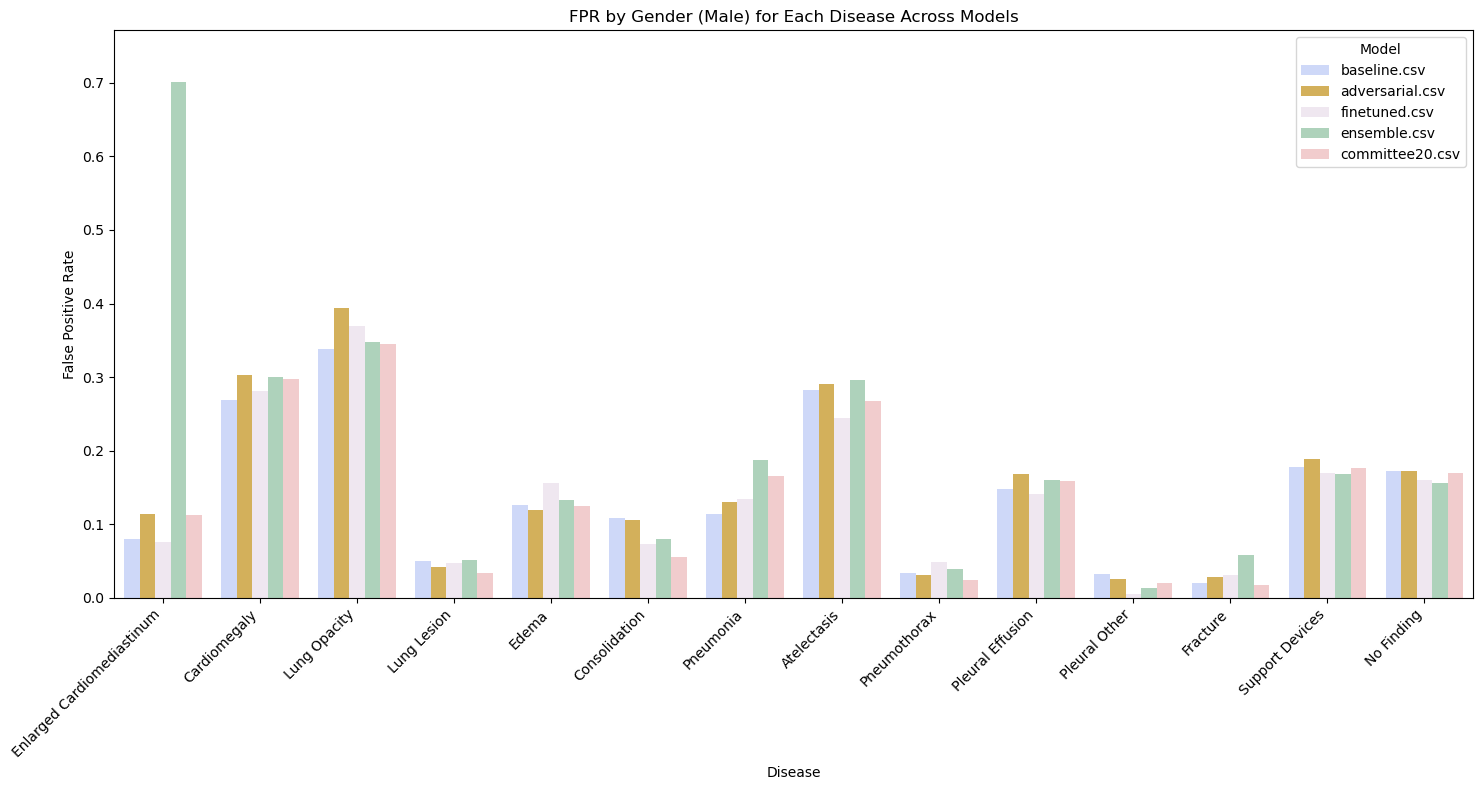

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pastel_colors = ['#c7d5ff', '#e7b847', '#f0e6f1', '#a8d8b9', '#f7c6c7', '#ffd8be']

# Prepare data for plotting
plot_data = []
for disease in diseases:
    for csv_file in csv_files:
        fpr_male = fpr_data[csv_file][disease].get("M", None)
        if fpr_male is not None:
            plot_data.append({"Disease": disease, "Model": csv_file, "FPR": fpr_male})

plot_df = pd.DataFrame(plot_data)

# Determine the global max FPR value for consistent scaling
max_fpr = plot_df["FPR"].max()

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(data=plot_df, x="Disease", y="FPR", hue="Model", palette=pastel_colors)
plt.xticks(rotation=45, ha="right")
plt.title("FPR by Gender (Male) for Each Disease Across Models")
plt.ylabel("False Positive Rate")
plt.xlabel("Disease")
plt.legend(title="Model")
plt.ylim(0, max_fpr * 1.1)  
plt.tight_layout()
plt.show()


# FPR by Gender (Female) for each disease across models

/var/folders/kt/w5w6m1w927nd4t7dr10qjl840000gn/T/ipykernel_40662/1499507670.py:18: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=plot_df, x="Disease", y="FPR", hue="Model", palette=pastel_colors)


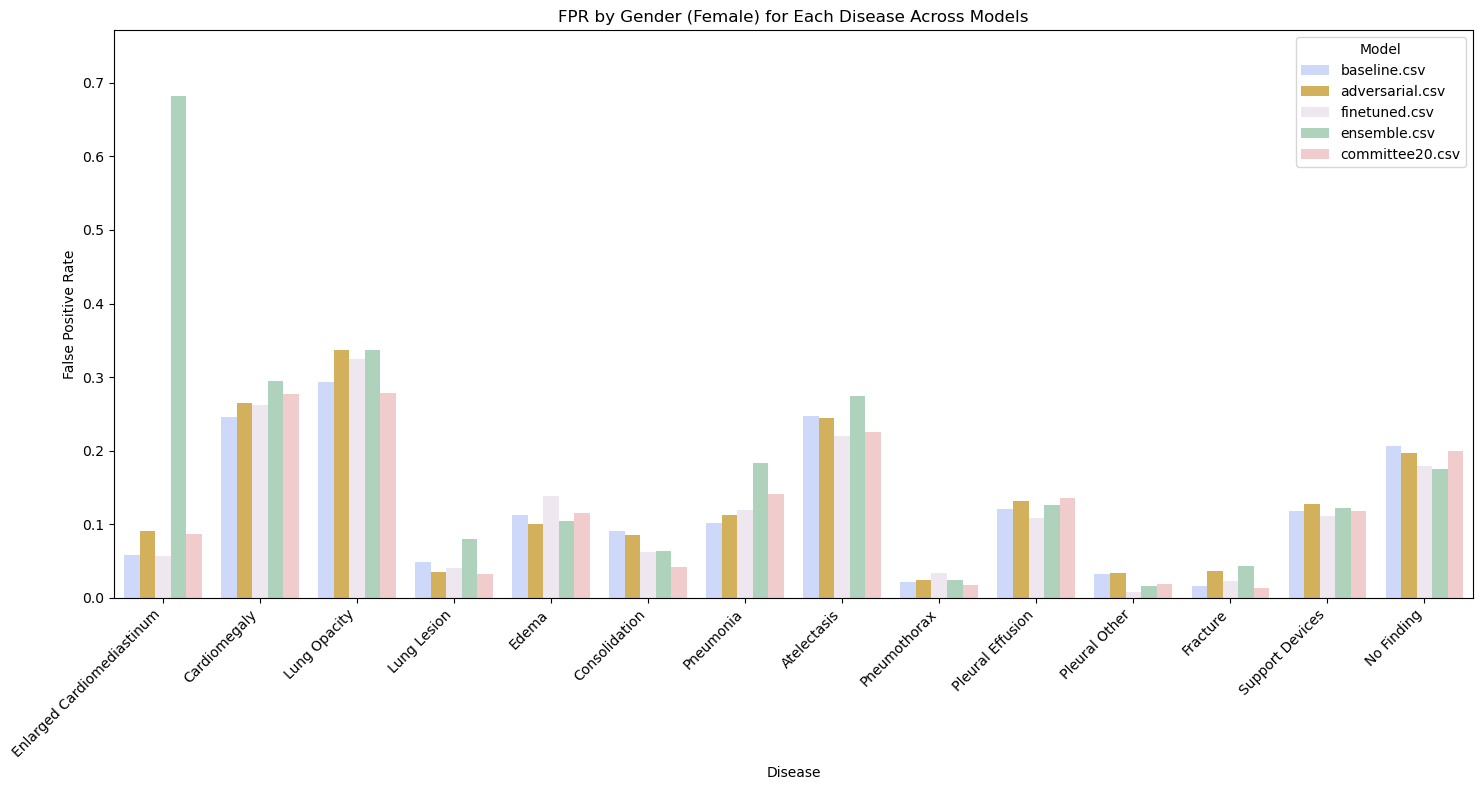

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
plot_data = []
for disease in diseases:
    for csv_file in csv_files:
        fpr_female = fpr_data[csv_file][disease].get("F", None)
        if fpr_female is not None:
            plot_data.append({"Disease": disease, "Model": csv_file, "FPR": fpr_female})

plot_df = pd.DataFrame(plot_data)

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(data=plot_df, x="Disease", y="FPR", hue="Model", palette=pastel_colors)
plt.xticks(rotation=45, ha="right")
plt.title("FPR by Gender (Female) for Each Disease Across Models")
plt.ylabel("False Positive Rate")
plt.xlabel("Disease")
plt.legend(title="Model")
plt.ylim(0, max_fpr * 1.1)  
plt.tight_layout()
plt.show()
